In [1]:
## Enable matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

## Imports
import pandas as pd
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

import numpy as np
from sklearn import ensemble

In [2]:
## Read in training data
train = pd.read_csv('train.csv')

In [3]:
## Make a function to prepare the data for training and testing
def process_data(dataset):
    
    ref = dataset[[
            'Id',
            'Ref',
            'Ref_5x5_10th',
            'Ref_5x5_50th',
            'Ref_5x5_90th',
            'RefComposite',
            'RefComposite_5x5_10th',
            'RefComposite_5x5_50th',
            'RefComposite_5x5_90th'
                       ]]
    
    ref_id_groups = ref.groupby('Id', as_index=False)
    ref = ref_id_groups.mean()
    
    rhohv = dataset[[
            'Id',
            'RhoHV',
            'RhoHV_5x5_10th',
            'RhoHV_5x5_50th',
            'RhoHV_5x5_90th'
        ]]
    
    rhohv_id_groups = rhohv.groupby('Id', as_index=False)
    rhohv = rhohv_id_groups.mean()
    
    zdr = dataset[[
            'Id',
            'Zdr',
            'Zdr_5x5_10th',
            'Zdr_5x5_50th',
            'Zdr_5x5_90th'
        ]]
    
    zdr_id_groups = zdr.groupby('Id', as_index=False)
    zdr = zdr_id_groups.mean()
    
    kdp = dataset[[
            'Id',
            'Kdp',
            'Kdp_5x5_10th',
            'Kdp_5x5_50th',
            'Kdp_5x5_90th'
        ]]
    
    kdp_id_groups = kdp.groupby('Id', as_index=False)
    kdp = kdp_id_groups.mean()
    
    other = dataset[[
            'Id',
            'radardist_km',
            'Expected'
        ]]
    
    other_id_groups = other.groupby('Id', as_index=False)
    other = other_id_groups.aggregate(np.amax)
    
    new_dataset = pd.merge(ref, rhohv, on='Id')
    new_dataset = pd.merge(new_dataset, zdr, on='Id')
    new_dataset = pd.merge(new_dataset, kdp, on='Id')
    new_dataset = pd.merge(new_dataset, other, on='Id')
    
    return new_dataset

In [4]:
## Process training data
ptrain = process_data(train)

In [5]:
ptrain

,Id,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,radardist_km,Expected
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.254000
1,2,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,0.998611,0.993611,0.998333,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,2,1.016000
2,3,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,0.801667,NaN,NaN,NaN,2.062500,NaN,NaN,NaN,NaN,10,26.162014
3,4,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,0.988333,NaN,0.988333,1.015833,-1.125000,NaN,0.500000,1.515625,7.029999,NaN,0.000000,6.329994,9,4.064002
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,774.700440
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.254000
6,7,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,15.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0.508000
7,8,19.600000,18.083333,19.200000,24.863636,24.590909,22.250000,23.727273,28.590909,0.931667,0.936667,0.993333,1.014524,1.156250,-0.593750,0.531250,1.026786,0.002499,-3.963338,-0.217506,3.734997,8,3.225002
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,18.288010
9,10,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,0.835833,0.945833,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,10,0.010000


In [6]:
ptrain['count'] = 1
counts = ptrain.groupby('Expected', as_index=False).count()
large_counts = counts[counts['count'] > 50]

In [7]:
def high_count(expected):
    return len(large_counts[large_counts['Expected'] == expected]) > 0

In [8]:
ptrain['large_count'] = map(high_count, ptrain['Expected'])

In [9]:
ptrain = ptrain[ptrain['large_count']]

In [10]:
## Clean up training data from outliers
ptrain = ptrain[ptrain['Expected'] < 500.0]
ptrain = ptrain.fillna(-1111.0)

In [11]:
ptrain

,Id,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,radardist_km,Expected,count,large_count
0,1,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,10,0.254000,1,True
1,2,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,0.998611,0.993611,0.998333,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,2,1.016000,1,True
2,3,-1111.000000,-1111.000000,-1111.000000,8.500000,-1111.000000,-1111.000000,-1111.000000,8.500000,-1111.000000,-1111.000000,-1111.000000,0.801667,-1111.000000,-1111.000000,-1111.000000,2.062500,-1111.000000,-1111.000000,-1111.000000,-1111.000000,10,26.162014,1,True
3,4,26.600000,20.071429,25.800000,30.269231,26.666667,21.090909,25.115385,32.230769,0.988333,-1111.000000,0.988333,1.015833,-1.125000,-1111.000000,0.500000,1.515625,7.029999,-1111.000000,0.000000,6.329994,9,4.064002,1,True
5,6,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,13,0.254000,1,True
6,7,14.750000,10.500000,12.500000,14.428571,14.750000,11.500000,14.875000,15.714286,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,13,0.508000,1,True
7,8,19.600000,18.083333,19.200000,24.863636,24.590909,22.250000,23.727273,28.590909,0.931667,0.936667,0.993333,1.014524,1.156250,-0.593750,0.531250,1.026786,0.002499,-3.963338,-0.217506,3.734997,8,3.225002,1,True
8,9,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,-1111.000000,18,18.288010,1,True
9,10,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,0.835833,0.945833,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,10,0.010000,1,True
10,11,19.285714,17.357143,19.928571,23.071429,19.285714,17.357143,19.928571,23.071429,0.985476,0.968333,0.991190,1.011667,0.482143,-0.428571,0.196429,0.964286,-1.450004,-2.458572,-0.150003,2.465709,12,2.540001,1,True


In [12]:
def twod(data, var1, var2, bounds = None):

    data_var1_nonan = data[~data[var1].isnull()]
    data_var2_nonan = data_var1_nonan[~data_var1_nonan[var2].isnull()]
    
    x = data[var1].values
    y = data[var2].values

    if bounds is None:
        xmin = x.min()
        xmax = x.max()
        ymin = y.min()
        ymax = y.max()
    else:
        
        (xmin, xmax, ymin, ymax) = bounds

    fig, ax = plt.subplots()

    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

    plt.hexbin(x, y, cmap=plt.cm.YlOrRd_r, gridsize=100, bins='log')
    plt.axis([xmin, xmax, ymin, ymax])

In [21]:
import itertools

## ========================================
class ScatterMatrix:
    """
    A class to create a matrix of scatter plots from a pandas data frame
    """
    
    ## ----------------------------------------
    def __init__(self, dataframe):
        """
        Constructor
        """
        
        self.data = dataframe
        
        self.n = 0
        self.variables = []
        self.labels = []
        self.lo = []
        self.hi = []
        
        
    ## ----------------------------------------
    def add(self, variable_name, lo=None, hi=None, label=None):
        """
        Add a variable to the matrix:
        'variable_name' is the name of the variable to plot as it appears in the data frame
        'label' is how the variable name should appear on the plot. If left unspecified, 'variable_name' will be used.
        'lo' is the lower bound to show for this variable. If left unspecifed, the minimum value will be used
        'hi' is the highest bound...
        """
        
        self.variables.append(variable_name)
        
        if label is None:
            label = variable_name
        self.labels.append(label)
        
        if lo is None:
            lo = self.data[variable_name].values.min()
        self.lo.append(lo)
        
        if hi is None:
            hi = self.data[variable_name].values.max()
        self.hi.append(hi)
        
        self.n += 1
        
        
    ## ----------------------------------------
    def plot(self):
        """
        produces the plot
        """
        
        fig, axes = plt.subplots(nrows=self.n, ncols=self.n, figsize=(2*self.n,2*self.n))
        fig.subplots_adjust(hspace=0.05, wspace=0.05)
        
        for ax in axes.flat:
            # Hide all ticks and labels
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            
            # Set background color
            ax.set_axis_bgcolor('white')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')

            # Set up ticks only on one side for the "edge" subplots...
            if ax.is_first_col():
                ax.yaxis.set_ticks_position('left')
            if ax.is_last_col():
                ax.yaxis.set_ticks_position('right')
            if ax.is_first_row():
                ax.xaxis.set_ticks_position('top')
            if ax.is_last_row():
                ax.xaxis.set_ticks_position('bottom')
                
        # Plot the data.
        for i, j in zip(*np.triu_indices_from(axes, k=1)):
            for x, y in [(i,j), (j,i)]:
                axes[x,y].set_ylim([self.lo[y], self.hi[y]])
                axes[x,y].set_xlim([self.lo[x], self.hi[x]])
                axes[x,y].scatter(
                    self.data[self.variables[x]].values, 
                    self.data[self.variables[y]].values, 
                    marker='.',
                    s=0.02
                )
                
    
        ## Labels on the diagonal
        for i, label in enumerate(self.labels):
            axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center')
            axes[i,i].grid(b=False)

        # Turn on the proper x or y axes ticks.
        for i, j in zip(range(self.n), itertools.cycle((-1, 0))):
            axes[j,i].xaxis.set_visible(True)
            axes[i,j].yaxis.set_visible(True)
        

In [22]:
sm = ScatterMatrix(ptrain)

In [23]:
sm.add('radardist_km', 0, 20)
sm.add('Ref', 0, 50)
sm.add('RefComposite', 0, 50)
sm.add('RhoHV', 0.8, 1.05)
sm.add('Zdr', -2,3)
sm.add('Kdp', -10, 10)
sm.add('Expected', 0, 50)

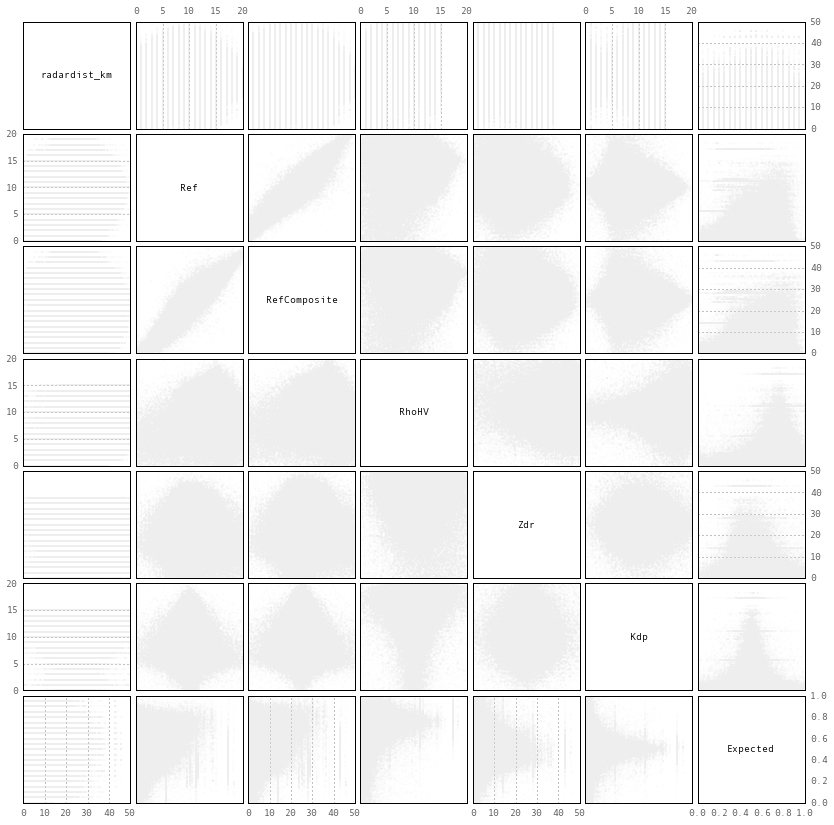

In [24]:
sm.plot()

In [ ]:
## Extract numpy arrays to pass to scikit-learn for training
train_data   = ptrain[['radardist_km', 'Ref', 'RefComposite', 'RefComposite_5x5_10th', 'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV', 'Zdr', 'Kdp']].values
train_target = ptrain['Expected'].values

In [ ]:
## Train the Boosted Regression trees
regressor = ensemble.GradientBoostingRegressor(n_estimators=500)
regressor.fit(train_data, train_target)

In [ ]:
def predict(radardist_km, Ref, RefComposite, RefComposite10, RefComposite50, RefComposite90, RhoHV, Zdr, Kdp):
    return regressor.predict([radardist_km, Ref, RefComposite, RefComposite10, RefComposite50, RefComposite90, RhoHV, Zdr, Kdp])[0]

In [ ]:
## Read in testing data
test = pd.read_csv('test.csv')
test['Expected'] = 0.0

In [ ]:
ptest = process_data(test)
ptest = ptest.fillna(-1111.0)

In [ ]:
ptest['Expected'] = map(
    predict,
    ptest['radardist_km'],
    ptest['Ref'],
    ptest['RefComposite'],
    ptest['RefComposite_5x5_10th'],
    ptest['RefComposite_5x5_50th'],
    ptest['RefComposite_5x5_90th'],
    ptest['RhoHV'],
    ptest['Zdr'],
    ptest['Kdp']
)

In [ ]:
ptest[['Id', 'Expected']].to_csv('predictions3.csv', index=False)